In [1]:
from sunpy.net.vso import VSOClient
import pytz
import os
from os import listdir
from os.path import isfile, join

from datetime import datetime
import sunpy.map
from sunpy.map import Map
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.colors import LogNorm
from astropy import units as u
# %matplotlib inline
client = VSOClient()

from astropy.io import fits
import astropy.units as u

C:\Users\Akared\Anaconda\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
C:\Users\Akared\Anaconda\lib\site-packages\glymur\lib\config.py:151: UserWarning: Neither the openjp2 nor the openjpeg library could be loaded.  
  warnings.warn(msg)


In [2]:
image_types = {
#     'AIA': ['94', '131', '171', '193', '211', '304', '335', '1600', '1700'],
    'HMI': ['los_magnetic_field', 'intensity']
}


Exception AttributeError: AttributeError('_coldefs',) in <bound method FITS_rec.__del__ of FITS_rec([(array([1929,    0]),), (array([1966, 1929]),),
       (array([1903, 3895]),), ..., (array([    1996, 11856583]),),
       (array([    1991, 11858579]),), (array([    1998, 11860570]),)], 
      dtype=(numpy.record, [('COMPRESSED_DATA', '>i4', (2,))]))> ignored
C:\Users\Akared\Anaconda\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


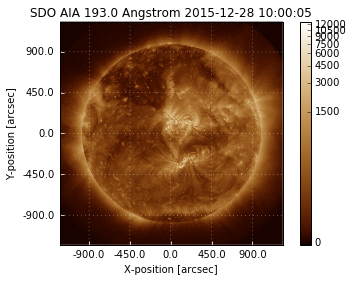

In [3]:
filename = "F:\\Research\\Data\\2016-03-26 14-28\\AIA_193\\aia_20151228_100005_0193_image_lev1.fits"
aia193 = Map(filename)   
aia193.peek()

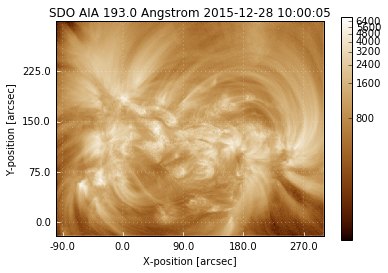

In [4]:
aia193_small = aia193.submap([-100.0,300.0]*u.arcsec, [300.0,-20.0]*u.arcsec) #([y range], [x range])
aia193_small.peek()

In [5]:
main_folder_name = '2016-03-26 14-28'
directory = 'F:/Research/Data/{0}'.format(main_folder_name)
def create_subdir(directory, instrument, imtype, process_type=False):
    subdirectory = instrument + '_' + imtype
    new_dir = directory + '/' + subdirectory
    if not process_type:
        pass
    else:
        new_dir += "_" + process_type
    if not os.path.exists(new_dir):
        os.makedirs(new_dir)
    return new_dir

In [6]:
process_type = "sample_segment"
for instrument, instrument_subtype in image_types.iteritems():
    for imtype in instrument_subtype:
        print instrument + '_' + imtype
        read_dir = create_subdir(directory, instrument, imtype)
        new_dir = create_subdir(directory, instrument, imtype, process_type)
        fits_files_list = [f for f in listdir(read_dir) if isfile(join(read_dir, f))]
        filename = fits_files_list[0]
        ax = Map('{0}/{1}'.format(read_dir,filename))   
#         ax_small = ax.submap([-200.0,300.0]*u.arcsec, [400.0,-100.0]*u.arcsec) #([x range], [y range])
        if instrument=='HMI':
            ax_small.rotate(angle=180*u.deg)
        ax_small.plot()
#         plt.savefig('{0}/{1}.png'.format(new_dir,(instrument + '_' + filename[0:len(filename)-5])), dpi=300)
        plt.savefig('{0}/{1}.png'.format(directory,(instrument + '_' + filename[0:len(filename)-5])), dpi=300)

#         save_filename = '{0}/{1}.fits'.format(directory,(instrument + '_' + filename[0:len(filename)-5] + "_test"))
#         try:
#             ax_small.save(save_filename, filetype="fits")
#         except IOError:
#             pass
#         image_data = fits.getdata('{0}/{1}_test.fits'.format(directory,(instrument + '_' + filename[0:len(filename)-5])))
#         print(type(image_data))
        plt.close()
        #currently, sunpy.map.save can only save fits file. can we save the submap to fits, then read using astropy?

        print filename
#         for filename_toplot in fits_files_list[:3]:
#             ax = sunpy.map.Map('{0}/{1}'.format(new_dir,filename_toplot))   
#             ax.plot()   
#             plt.colorbar()  
#             ax.draw_limb() 
#             plt.savefig('{0}/{1}.png'.format(directory,(instrument + '_' + filename_toplot[0:len(filename_toplot)-5])), dpi=300)
#             plt.close()

HMI_los_magnetic_field


IndexError: list index out of range

In [7]:
read_dir

'F:/Research/Data/2016-03-26 14-28/HMI_los_magnetic_field'

In [32]:
ax_small

SunPy HMIMap
---------
Observatory:	 SDO
Instrument:	 HMI FRONT2
Detector:	 HMI
Measurement:	 magnetogram
Wavelength:	 6173.0 Angstrom
Obs Date:	 2015-12-28 03:16:08
dt:		 0.000000 s
Dimension:	 [ 992.  990.] pix
scale:		 [ 0.504315  0.504315] arcsec / pix

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])

In [ ]:
#insert line

#Extracting data with astropy

In [44]:
filename = "F:\\Research\\Data\\2016-03-26 14-28\\AIA_193\\aia_20151228_100005_0193_image_lev1.fits"
image_data = fits.getdata(filename)
print(type(image_data))
print(image_data.shape)

<type 'numpy.ndarray'>
(4096L, 4096L)


In [45]:
im = Image.fromarray(image_data)

In [50]:
im.save("test_im.jpeg")

KeyError: '.jpeg'

<matplotlib.colorbar.Colorbar instance at 0x0000000025F2D908>

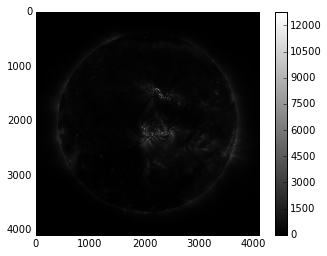

In [24]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

[<matplotlib.text.Text at 0x25dc10f0>, <matplotlib.text.Text at 0x25df2438>]

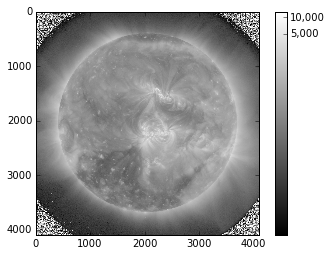

In [25]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [ ]:
image_data_array = image_data

#Try saving the image 

In [30]:
import Image

In [31]:
image_data_test.save("test_im2.png")

AttributeError: 'numpy.ndarray' object has no attribute 'save'

In [28]:
image_data_test = (image_data*255).astype('uint8')
plt.imsave("test_im.png", image_data)
plt.imwrite("test_im2.png", image_data_test)


AttributeError: 'module' object has no attribute 'imwrite'